# 3장 신경망 시작하기

## 3-1 신경망의 구조

### 3-1-1 층: 딥러닝의 구성 단위

In [ ]:
from keras import layers

layer = layers.Dense(32, input_shape=(784,))

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32 , input_shape=(784,)))
model.add(layers.Dense(10))

### 3-1-2 모델: 층의 네트워크

### 3-1-3 손실 함수와 옵티마이저: 학습 과정을 조절하는 열쇠

## 3-2 케라스 소개

### 3-2-1 케라스, 텐서플로 , 씨아노, CNTK

### 3-2-2 케라스를 사용한 개발: 빠르게 둘러보기

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32 , activation = 'relu' , input_shape=(784,)))
model.add(layers.Dense(10 , activation = 'softmax'))

In [ ]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32 , activation='relu')(input_tensor)
output_tensor = layers.Dense(10 , activation = 'softmax')(x)

model = models.Model(inputs = input_tensor, outputs=output_tensor)

In [ ]:
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr=0.001) , loss = 'mse' , metrics=['accuracy'])

In [ ]:
model.fit( input_tensor , target_tensor , batch_sizr = 128 , epochs=10 )

## 3-3 딥러닝 컴퓨터 셋팅

### 3-3-1 주피터 노트북: 딥러닝 실험을 위한 최적의 방법

### 3-3-2 케라스 시작하기: 두 가지 방법

### 3-3-3 클라우드에서 딥러닝 작업을 수행했을 때 장단점

### 3-3-4 어떤 GPU 카드가 딥러닝에 최적일까?

## 3-4 영화 리뷰 분류: 이진 분류 예제

### 3-4-1 IMDB 데이터셋

In [ ]:
from keras.datasets import imdb

(train_data , train_labels) , (test_data , test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
import numpy as np

def vectorize_sequences(sequences , dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i , sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels.astype('float32'))

### 3-4-3 신경망 모델 만들기

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16 , activation='relu' , input_shape=(10000,)))
model.add(layers.Dense(16 , activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr=0.001) ,
              loss = 'losses.binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


### 3-4-4 훈련 검증

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train , partial_y_train , epochs=20 , batch_size =512 , validation_data=(x_val , y_val))

Epoch 1/20
30/30 [==============================] - 5s 52ms/step - loss: 0.5267 - acc: 0.7745 - val_loss: 0.3933 - val_acc: 0.8686
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3136 - acc: 0.9008 - val_loss: 0.3169 - val_acc: 0.8791
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2271 - acc: 0.9282 - val_loss: 0.2877 - val_acc: 0.8873
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1753 - acc: 0.9445 - val_loss: 0.3159 - val_acc: 0.8735
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1470 - acc: 0.9517 - val_loss: 0.3197 - val_acc: 0.8755
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1166 - acc: 0.9643 - val_loss: 0.2954 - val_acc: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0941 - acc: 0.9724 - val_loss: 0.3085 - val_acc: 0.8820
Epoch 8/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0767 - a

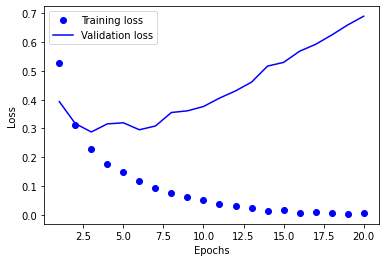

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss , 'bo' , label='Training loss')
plt.plot(epochs, val_loss , 'b' , label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

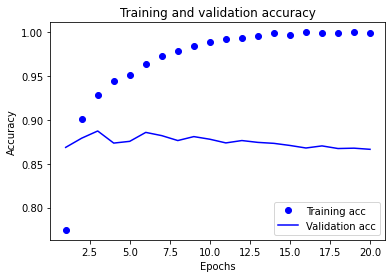

In [ ]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs ,  acc , 'bo' , label='Training acc')
plt.plot(epochs, val_acc , 'b' , label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16 , activation='relu' , input_shape=(10000,)))
model.add(layers.Dense(16 , activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss = 'binary_crossentropy' , metrics = ['accuracy'])

model.fit(x_train , y_train , epochs=4 , batch_size = 512)
results = model.evaluate(x_test , y_test)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4519 - accuracy: 0.8198
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2609 - accuracy: 0.9104
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2030 - accuracy: 0.9290
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2963 - accuracy: 0.8819


### 3-4-5 훈련된 모델로 새로운 데이터에 대해 예측하기

In [ ]:
model.predict(x_test)

array([[0.24219932],
       [0.9998691 ],
       [0.93756366],
       ...,
       [0.14380167],
       [0.09265055],
       [0.63077   ]], dtype=float32)

### 3-4-6 추가 실험

### 3-4-7 정리

## 3-5 뉴스 기사 분류: 다중 분류 문제

### 3-5-1 로이터 데이터 셋

In [ ]:
from keras.datasets import reuters

(train_data , train_labels) , (test_data , test_labels) = reuters.load_data(num_words=10000)

In [ ]:
train_labels.shape

(8982,)

In [ ]:
test_lables.shape

(2246,)

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value , key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3 , '?' ) for i in train_data[0] ] ) 

### 3-5-2 데이터 준비

In [ ]:
import numpy as np

def vectorize_sequences(sequences , dimension = 10000):
    results = np.zeros((len(sequences) , dimension))
    for i, sequence in enumerate(sequences):
        results[i , sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels , dimension = 46):
    results = np.zeros((len(labels) , dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
test_labels.shape

(2246,)

In [ ]:
test_data.shape

(2246,)

### 3-5-3 모델구성

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64 , activation='relu' , input_shape=(10000,)))
model.add(layers.Dense(64 , activation='relu'))
model.add(layers.Dense(46 , activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

### 3-5-4 훈련 검증

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val , y_val) )

Epoch 1/20
16/16 [==============================] - 1s 33ms/step - loss: 2.5344 - accuracy: 0.5356 - val_loss: 1.6714 - val_accuracy: 0.6560
Epoch 2/20
16/16 [==============================] - 1s 34ms/step - loss: 1.3841 - accuracy: 0.7199 - val_loss: 1.3056 - val_accuracy: 0.7160
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.0424 - accuracy: 0.7829 - val_loss: 1.1417 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 32ms/step - loss: 0.8258 - accuracy: 0.8321 - val_loss: 1.0416 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 0s 24ms/step - loss: 0.6647 - accuracy: 0.8637 - val_loss: 0.9706 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.5298 - accuracy: 0.8938 - val_loss: 0.9459 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 33ms/step - loss: 0.4296 - accuracy: 0.9134 - val_loss: 0.9131 - val_accuracy: 0.8130
Epoch 8/20
16

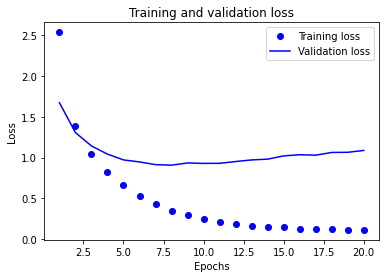

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs , loss , 'bo' , label='Training loss')
plt.plot(epochs , val_loss , 'b' , label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

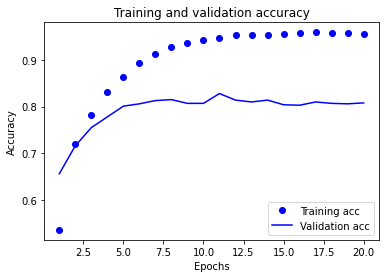

In [ ]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs , acc , 'bo' , label='Training acc')
plt.plot(epochs , val_acc , 'b' , label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64 , activation='relu' , input_shape=(10000,) ) )
model.add(layers.Dense(64 , activation='relu'))
model.add(layers.Dense(46 , activation='softmax'))

model.compile(optimizer='rmsprop',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train ,
          partial_y_train,
          epochs=9,
          batch_size = 512,
          validation_data = (x_val,y_val))

results = model.evaluate( x_test , one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 38ms/step - loss: 2.6136 - accuracy: 0.4965 - val_loss: 1.7387 - val_accuracy: 0.6530
Epoch 2/9
16/16 [==============================] - 0s 26ms/step - loss: 1.4241 - accuracy: 0.7048 - val_loss: 1.3049 - val_accuracy: 0.7180
Epoch 3/9
16/16 [==============================] - 0s 25ms/step - loss: 1.0537 - accuracy: 0.7750 - val_loss: 1.1272 - val_accuracy: 0.7660
Epoch 4/9
16/16 [==============================] - 0s 22ms/step - loss: 0.8199 - accuracy: 0.8305 - val_loss: 1.0334 - val_accuracy: 0.7850
Epoch 5/9
16/16 [==============================] - 0s 24ms/step - loss: 0.6450 - accuracy: 0.8701 - val_loss: 0.9726 - val_accuracy: 0.7970
Epoch 6/9
16/16 [==============================] - 0s 25ms/step - loss: 0.5154 - accuracy: 0.8965 - val_loss: 0.9200 - val_accuracy: 0.8150
Epoch 7/9
16/16 [==============================] - 0s 22ms/step - loss: 0.4111 - accuracy: 0.9142 - val_loss: 0.9096 - val_accuracy: 0.8190
Epoch 8/9
16/16 [===

### 3-5-5 새로운 데이터에 대해 예측하기

In [ ]:
predictions = model.predict(x_test)

### 3-5-6 레이블과 손실을 다루는 다른 방법

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

### 3-5-7 충분히 큰 중간층을 두어야 하는 이유

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64 , activation='relu' , input_shape=(10000,)))
model.add(layers.Dense(4 , activation='relu'))
model.add(layers.Dense(46 , activation='softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val , y_val))

Epoch 1/20
63/63 [==============================] - 2s 20ms/step - loss: 3.3679 - accuracy: 0.1463 - val_loss: 2.8123 - val_accuracy: 0.3630
Epoch 2/20
63/63 [==============================] - 1s 12ms/step - loss: 2.2533 - accuracy: 0.5355 - val_loss: 1.8552 - val_accuracy: 0.6020
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 1.5752 - accuracy: 0.6487 - val_loss: 1.5383 - val_accuracy: 0.6480
Epoch 4/20
63/63 [==============================] - 1s 12ms/step - loss: 1.3432 - accuracy: 0.6729 - val_loss: 1.4504 - val_accuracy: 0.6480
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 1.2232 - accuracy: 0.6802 - val_loss: 1.4146 - val_accuracy: 0.6460
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 1.1374 - accuracy: 0.6853 - val_loss: 1.4017 - val_accuracy: 0.6490
Epoch 7/20
63/63 [==============================] - 1s 12ms/step - loss: 1.0721 - accuracy: 0.6961 - val_loss: 1.4147 - val_accuracy: 0.6540
Epoch 8/20
63

## 3-6 주택 가격 예측: 회귀 문제

### 3-6-1 보스턴 주택 가격 데이터 셋

In [4]:
from keras.datasets import boston_housing

(train_data , train_targets) , (test_data , test_target) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [5]:
train_data.shape

(404, 13)

In [6]:
test_data.shape

(102, 13)

In [7]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### 3-6-2 데이터 준비

In [8]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

### 3-6-3 모델 구성

In [9]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64 , activation='relu',
                           input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64 , activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop' , loss='mse' , metrics=['mae'])
    return model

### 3-6-4 K-겹 검증을 사용한 훈련 검증

In [10]:
import numpy as np

k = 4

num_val_samples = len(train_data) //k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples] , train_data[(i+1) * num_val_samples:]],
        axis = 0
    )
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples] , train_targets[(i+1) * num_val_samples:]],
        axis = 0
    )

    model = build_model()
    model.fit(partial_train_data , partial_train_targets, epochs=num_epochs , batch_size =1 , verbose=0)
    val_mse, val_mae = model.evaluate(val_data , val_targets , verbose=0)
    all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 퐁드 #' , i)
    val_targets = train_data[i*num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1) * num_val_samples:]],
         axis = 0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i+1) * num_val_samples:]],
         axis= 0
    )

    model = build_model()
    history = model.fit(partial_train_data , partial_train_targets,
                        validation_data = (val_data , val_targets),
                        epochs = num_epochs , batch_size=1 , verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

처리중인 퐁드 # 0


In [20]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [ ]:
average_mae_history = [
                       np.mean([x[i] for x in all_mae_histories])  for i in range(num_epochs)
]

In [ ]:
import matplotlob.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1) , average_mae_history)

In [ ]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        previous = smoothed_points[-1]
        smoothed_points.append(previous * factor + point * (1 - factor))
    else:
        smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1)  , smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
model = build_model()
model.fit(train_data , train_targets , epochs=80 , batch_size = 16 , verbose = 0)
test_mse_score , test_mae_score = model.evaluate(test_data , test_targets)